# Rock-Paper-Scissors Game

## Let's start with a simple version of the game

### first imports

In [1]:
import random


### let's define the possible actions

In [2]:
possible_actions = ["rock", "paper", "scissors"]

### let's define the user action

In [3]:
user_action = input("Enter a choice (rock, paper, scissors): ")


Enter a choice (rock, paper, scissors): 


### let's define the computer action

In [4]:
computer_action = random.choice(possible_actions)

### let's print the user and computer actions

In [5]:
print(f"\nYou chose {user_action}, computer chose {computer_action}.\n")



You chose , computer chose rock.



### let's define the game rules

In [6]:
if user_action == computer_action:
    print(f"Both players selected {user_action}. It's a tie!")
elif user_action == "rock":
    if computer_action == "scissors":
        print("Rock smashes scissors! You win!")
    else:
        print("Paper covers rock! You lose.")
elif user_action == "paper":
    if computer_action == "rock":
        print("Paper covers rock! You win!")
    else:
        print("Scissors cuts paper! You lose.")
elif user_action == "scissors":
    if computer_action == "paper":
        print("Scissors cuts paper! You win!")
    else:
        print("Rock smashes scissors! You lose.")

###  ask the user if he wants to play again

In [7]:
while True:
    user_action = input("Enter a choice (rock, paper, scissors): ")
    possible_actions = ["rock", "paper", "scissors"]
    computer_action = random.choice(possible_actions)
    print(f"\nYou chose {user_action}, computer chose {computer_action}.\n")

    if user_action == computer_action:
        print(f"Both players selected {user_action}. It's a tie!")
    elif user_action == "rock":
        if computer_action == "scissors":
            print("Rock smashes scissors! You win!")
        else:
            print("Paper covers rock! You lose.")
    elif user_action == "paper":
        if computer_action == "rock":
            print("Paper covers rock! You win!")
        else:
            print("Scissors cuts paper! You lose.")
    elif user_action == "scissors":
        if computer_action == "paper":
            print("Scissors cuts paper! You win!")
        else:
            print("Rock smashes scissors! You lose.")

    play_again = input("Play again? (y/n): ")
    if play_again.lower() != "y":
        break

Enter a choice (rock, paper, scissors): 

You chose , computer chose rock.

Play again? (y/n): 


In [8]:
play_again = "yes"
print('play_again == "n"',play_again == "n")
print('play_again != "y"',play_again != "y")

play_again == "n" False
play_again != "y" True


## Let's improve the game

### let's define the possible actions

*N.B. le due celle (9) e (10) forse le possiamo eliminare per andare direttamente sull'enum.*

In [9]:
ROCK_ACTION = 0
PAPER_ACTION = 1
SCISSORS_ACTION = 2

### let's define the user action

In [10]:
user_input = input("Enter a choice (rock[0], paper[1], scissors[2]): ")
user_action = int(user_input)
if user_action == ROCK_ACTION:
    print("You chose rock.")
elif user_action == PAPER_ACTION:
    print("You chose paper.")
elif user_action == SCISSORS_ACTION:
    print("You chose scissors.")

Enter a choice (rock[0], paper[1], scissors[2]): 


ValueError: invalid literal for int() with base 10: ''

### let's define Action as IntEnum

In [11]:
from enum import IntEnum

class Action(IntEnum):
    Rock = 0
    Paper = 1
    Scissors = 2

In [12]:
print('Action.Rock == Action.Rock',Action.Rock == Action.Rock)
print('Action.Rock == Action(0)',Action.Rock == Action(0))
print('Action(0)',Action(0))

Action.Rock == Action.Rock True
Action.Rock == Action(0) True
Action(0) Action.Rock


### let's define a function to get the user action

In [13]:
def get_user_selection():
    user_input = input("Enter a choice (rock[0], paper[1], scissors[2]): ")
    selection = int(user_input)
    action = Action(selection)
    return action

In [14]:
get_user_selection()

Enter a choice (rock[0], paper[1], scissors[2]): 


ValueError: invalid literal for int() with base 10: ''

### let's define a function to get the computer action

In [15]:
def get_computer_selection():
    selection = random.randint(0, len(Action) - 1)
    action = Action(selection)
    return action

In [16]:
get_computer_selection()

<Action.Paper: 1>

### let's define a function to determine the winner

In [17]:
def determine_winner(user_action, computer_action):
    if user_action == computer_action:
        print(f"Both players selected {user_action.name}. It's a tie!")
    elif user_action == Action.Rock:
        if computer_action == Action.Scissors:
            print("Rock smashes scissors! You win!")
        else:
            print("Paper covers rock! You lose.")
    elif user_action == Action.Paper:
        if computer_action == Action.Rock:
            print("Paper covers rock! You win!")
        else:
            print("Scissors cuts paper! You lose.")
    elif user_action == Action.Scissors:
        if computer_action == Action.Paper:
            print("Scissors cuts paper! You win!")
        else:
            print("Rock smashes scissors! You lose.")

In [18]:
determine_winner(Action.Rock, Action.Scissors)

Rock smashes scissors! You win!


### what happens if we pass an invalid action?

In [19]:
try:
    Action(3)
except Exception as e:
    print(e)

3 is not a valid Action


### let's define a function to start the game

In [20]:
while True:
    try:
        user_action = get_user_selection()
    except ValueError as e:
        range_str = f"[0, {len(Action) - 1}]"
        print(f"Invalid selection. Enter a value in range {range_str}")
        continue

    computer_action = get_computer_selection()
    determine_winner(user_action, computer_action)

    play_again = input("Play again? (y/n): ")
    if play_again.lower() != "y":
        break

Enter a choice (rock[0], paper[1], scissors[2]): 
Invalid selection. Enter a value in range [0, 2]
Enter a choice (rock[0], paper[1], scissors[2]): 
Invalid selection. Enter a value in range [0, 2]
Enter a choice (rock[0], paper[1], scissors[2]): 0
Both players selected Rock. It's a tie!
Play again? (y/n): n


In [21]:
def start_game():
    while True:
        try:
            user_action = get_user_selection()
        except ValueError as e:
            range_str = f"[0, {len(Action) - 1}]"
            print(f"Invalid selection. Enter a value in range {range_str}")
            continue

        computer_action = get_computer_selection()
        determine_winner(user_action, computer_action)

        play_again = input("Play again? (y/n): ")
        if play_again.lower() != "y":
            break

In [22]:
start_game()

Enter a choice (rock[0], paper[1], scissors[2]): 0
Paper covers rock! You lose.
Play again? (y/n): n


## Let's improve the game

### time to generalize get_user_selection

In [23]:
def get_user_selection():
    choices = [f"{action.name}[{action.value}]" for action in Action]
    choices_str = ", ".join(choices)
    selection = int(input(f"Enter a choice ({choices_str}): "))
    action = Action(selection)
    return action



In [24]:
get_user_selection()

Enter a choice (Rock[0], Paper[1], Scissors[2]): 


ValueError: invalid literal for int() with base 10: ''

### time to generalize determine_winner

### time to map what beats what

In [25]:
victories = {
    Action.Rock: [Action.Scissors],  # Rock beats scissors
    Action.Paper: [Action.Rock],  # Paper beats rock
    Action.Scissors: [Action.Paper]  # Scissors beats paper
}

In [26]:
def determine_winner(user_action, computer_action):
    print(f"You chose {user_action.name}. The computer chose {computer_action.name}.")
    defeats = victories[user_action]
    if user_action == computer_action:
        print(f"Both players selected {user_action.name}. It's a tie!")
    elif computer_action in defeats:
        print(f"{user_action.name} beats {computer_action.name}! You win!")
    else:
        print(f"{computer_action.name} beats {user_action.name}! You lose.")

In [27]:
determine_winner(Action.Rock, Action.Scissors)


You chose Rock. The computer chose Scissors.
Rock beats Scissors! You win!


In [28]:
start_game()

Enter a choice (Rock[0], Paper[1], Scissors[2]): 
Invalid selection. Enter a value in range [0, 2]
Enter a choice (Rock[0], Paper[1], Scissors[2]): 
Invalid selection. Enter a value in range [0, 2]
Enter a choice (Rock[0], Paper[1], Scissors[2]): 
Invalid selection. Enter a value in range [0, 2]
Enter a choice (Rock[0], Paper[1], Scissors[2]): 
Invalid selection. Enter a value in range [0, 2]
Enter a choice (Rock[0], Paper[1], Scissors[2]): 0
You chose Rock. The computer chose Paper.
Paper beats Rock! You lose.
Play again? (y/n): n


## Let's improve the game Time for Rock Paper Scissors Lizard Spock

### let's define the new possible actions

In [29]:
class Action(IntEnum):
    Rock = 0
    Paper = 1
    Scissors = 2
    Lizard = 3
    Spock = 4

victories = {
    Action.Scissors: [Action.Lizard, Action.Paper],
    Action.Paper: [Action.Spock, Action.Rock],
    Action.Rock: [Action.Lizard, Action.Scissors],
    Action.Lizard: [Action.Spock, Action.Paper],
    Action.Spock: [Action.Scissors, Action.Rock]
}


In [30]:
start_game()

Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 
Invalid selection. Enter a value in range [0, 4]
Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 
Invalid selection. Enter a value in range [0, 4]
Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 
Invalid selection. Enter a value in range [0, 4]
Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 0
You chose Rock. The computer chose Rock.
Both players selected Rock. It's a tie!
Play again? (y/n): n


### let's define the ascii art

In [31]:
ascii_action = {
    Action.Scissors: r"""
     _____      _
    /  ___|    (_)
    \ `--.  ___ _ ___ ___  ___  _ __ ___
     `--. \/ __| / __/ __|/ _ \| '__/ __|
    /\__/ / (__| \__ \__ \ (_) | |  \__ \\
    \____/ \___|_|___/___/\___/|_|  |___/
    """,
    Action.Paper: r"""
    ______
    | ___ \
    | |_/ /_ _ _ __   ___ _ __
    |  __/ _` | '_ \ / _ \ '__|
    | | | (_| | |_) |  __/ |
    \_|  \__,_| .__/ \___|_|
              | |
              |_|
     """,
    Action.Rock: r"""
    ______           _
    | ___ \         | |
    | |_/ /___   ___| | __
    |    // _ \ / __| |/ /
    | |\ \ (_) | (__|   <
    \_| \_\___/ \___|_|\_\

     """,
    Action.Lizard: r"""
     _     _                      _
    | |   (_)                    | |
    | |    _ __________ _ _ __ __| |
    | |   | |_  /_  / _` | '__/ _` |
    | |___| |/ / / / (_| | | | (_| |
    \_____/_/___/___\__,_|_|  \__,_|
     """,
    Action.Spock: r"""
     _____                  _
    /  ___|                | |
    \ `--. _ __   ___   ___| | __
     `--. \ '_ \ / _ \ / __| |/ /
    /\__/ / |_) | (_) | (__|   <
    \____/| .__/ \___/ \___|_|\_\\
          | |
          |_|
    """
}

COMPUTER_WIN=-1
HUMAN_WIN=1
DROW=0
ascii_result = {
    COMPUTER_WIN: r"""
 _____ ________  _________ _   _ _____ ___________
/  __ \  _  |  \/  || ___ \ | | |_   _|  ___| ___ \\
| /  \/ | | | .  . || |_/ / | | | | | | |__ | |_/ /
| |   | | | | |\/| ||  __/| | | | | | |  __||    /
| \__/\ \_/ / |  | || |   | |_| | | | | |___| |\ \
 \____/\___/\_|  |_/\_|    \___/  \_/ \____/\_| \_|


 _    _ _____ _   _  _____   _ _ _
| |  | |_   _| \ | |/  ___| | | | |
| |  | | | | |  \| |\ `--.  | | | |
| |/\| | | | | . ` | `--. \ | | | |
\  /\  /_| |_| |\  |/\__/ / |_|_|_|
 \/  \/ \___/\_| \_/\____/  (_|_|_)

                                                   """,
    HUMAN_WIN: r"""
 _   _ _   ____  ___  ___   _   _
| | | | | | |  \/  | / _ \ | \ | |
| |_| | | | | .  . |/ /_\ \|  \| |
|  _  | | | | |\/| ||  _  || . ` |
| | | | |_| | |  | || | | || |\  |
\_| |_/\___/\_|  |_/\_| |_/\_| \_/


 _    _ _____ _   _  _____   _ _ _
| |  | |_   _| \ | |/  ___| | | | |
| |  | | | | |  \| |\ `--.  | | | |
| |/\| | | | | . ` | `--. \ | | | |
\  /\  /_| |_| |\  |/\__/ / |_|_|_|
 \/  \/ \___/\_| \_/\____/  (_|_|_)


        __
       / _|
      | |_ ___  _ __   _ __   _____      __
      |  _/ _ \| '__| | '_ \ / _ \ \ /\ / /
 _ _ _| || (_) | |    | | | | (_) \ V  V /   _ _ _
(_|_|_)_| \___/|_|    |_| |_|\___/ \_/\_/   (_|_|_)

                                                   """,
    DROW: r"""
         _   _          _
        | | (_)        | |
  __ _  | |_ _  ___  __| |   __ _  __ _ _ __ ___   ___
 / _` | | __| |/ _ \/ _` |  / _` |/ _` | '_ ` _ \ / _ \\
| (_| | | |_| |  __/ (_| | | (_| | (_| | | | | | |  __/
 \__,_|  \__|_|\___|\__,_|  \__, |\__,_|_| |_| |_|\___|
                             __/ |
                            |___/
  ___                     _                _            __
 / / |                   | |              (_)           \ \\
| || |__   _____      __ | |__   ___  _ __ _ _ __   __ _ | |
| || '_ \ / _ \ \ /\ / / | '_ \ / _ \| '__| | '_ \ / _` || |
| || | | | (_) \ V  V /  | |_) | (_) | |  | | | | | (_| || |
| ||_| |_|\___/ \_/\_/   |_.__/ \___/|_|  |_|_| |_|\__, || |
 \_\                                                __/ /_/
                                                   |___/    """
}

### Let's create two new fuctions for a better GUI

In [32]:
def display_action(action):
    print(ascii_action[action])

def display_result(result):
    print(ascii_result[result])

In [33]:
display_action(Action.Spock)


     _____                  _
    /  ___|                | |
    \ `--. _ __   ___   ___| | __
     `--. \ '_ \ / _ \ / __| |/ /
    /\__/ / |_) | (_) | (__|   <
    \____/| .__/ \___/ \___|_|\_\\
          | |
          |_|
    


In [34]:
display_result(DROW)


         _   _          _
        | | (_)        | |
  __ _  | |_ _  ___  __| |   __ _  __ _ _ __ ___   ___
 / _` | | __| |/ _ \/ _` |  / _` |/ _` | '_ ` _ \ / _ \\
| (_| | | |_| |  __/ (_| | | (_| | (_| | | | | | |  __/
 \__,_|  \__|_|\___|\__,_|  \__, |\__,_|_| |_| |_|\___|
                             __/ |
                            |___/
  ___                     _                _            __
 / / |                   | |              (_)           \ \\
| || |__   _____      __ | |__   ___  _ __ _ _ __   __ _ | |
| || '_ \ / _ \ \ /\ / / | '_ \ / _ \| '__| | '_ \ / _` || |
| || | | | (_) \ V  V /  | |_) | (_) | |  | | | | | (_| || |
| ||_| |_|\___/ \_/\_/   |_.__/ \___/|_|  |_|_| |_|\__, || |
 \_\                                                __/ /_/
                                                   |___/    


### Let's Modify the determine_winner function

In [35]:
def determine_winner(user_action, computer_action):
    print(f"You chose")
    display_action(user_action)
    print(f"The computer chose")
    display_action(computer_action)
    defeats = victories[user_action]
    if user_action == computer_action:
        display_result(DROW)
        return DROW
    elif computer_action in defeats:
       display_result(HUMAN_WIN)
       return HUMAN_WIN
    else:
       display_result(COMPUTER_WIN)
       return COMPUTER_WIN


In [36]:
start_game()

Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 
Invalid selection. Enter a value in range [0, 4]
Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 
Invalid selection. Enter a value in range [0, 4]
Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 
Invalid selection. Enter a value in range [0, 4]
Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 0
You chose

    ______           _
    | ___ \         | |
    | |_/ /___   ___| | __
    |    // _ \ / __| |/ /
    | |\ \ (_) | (__|   <
    \_| \_\___/ \___|_|\_\

     
The computer chose

    ______
    | ___ \
    | |_/ /_ _ _ __   ___ _ __
    |  __/ _` | '_ \ / _ \ '__|
    | | | (_| | |_) |  __/ |
    \_|  \__,_| .__/ \___|_|
              | |
              |_|
     

 _____ ________  _________ _   _ _____ ___________
/  __ \  _  |  \/  || ___ \ | | |_   _|  ___| ___ \\
| /  \/ | | | .  . || |_/ / | | | | | | |__ | |_/ /
| |   | | | | |\/| ||  __/| | | |

### Let's add a new function to print the game results

In [37]:
def print_game_results(game_results):
    num_tied = game_results.count(DROW)/len(game_results)*100
    num_player_wins = game_results.count(HUMAN_WIN)/len(game_results)*100
    num_computer_wins =game_results.count(COMPUTER_WIN)/len(game_results)*100

    print( 'There were ', num_tied, '% tied games', "\nthe player won ", num_player_wins, '% of games\nthe computer won ', num_computer_wins, '% of games\nin a total of ', len(game_results), ' games')

### Let's add a new function to start the game and memorize all games

In [38]:
def start_game(num_games=1):
    game_results=[]
    counter=0
    while True:
        try:
            user_action = get_user_selection()
        except ValueError as e:
            range_str = f"[0, {len(Action) - 1}]"
            print(f"Invalid selection. Enter a value in range {range_str}")
            continue

        computer_action = get_computer_selection()
        game_results.append(determine_winner(user_action, computer_action))
        counter+=1

        if counter>=num_games:
            break
    print_game_results(game_results)
    return game_results

In [39]:
game_results=start_game(5)

Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 0
You chose

    ______           _
    | ___ \         | |
    | |_/ /___   ___| | __
    |    // _ \ / __| |/ /
    | |\ \ (_) | (__|   <
    \_| \_\___/ \___|_|\_\

     
The computer chose

    ______
    | ___ \
    | |_/ /_ _ _ __   ___ _ __
    |  __/ _` | '_ \ / _ \ '__|
    | | | (_| | |_) |  __/ |
    \_|  \__,_| .__/ \___|_|
              | |
              |_|
     

 _____ ________  _________ _   _ _____ ___________
/  __ \  _  |  \/  || ___ \ | | |_   _|  ___| ___ \\
| /  \/ | | | .  . || |_/ / | | | | | | |__ | |_/ /
| |   | | | | |\/| ||  __/| | | | | | |  __||    /
| \__/\ \_/ / |  | || |   | |_| | | | | |___| |\ \
 \____/\___/\_|  |_/\_|    \___/  \_/ \____/\_| \_|


 _    _ _____ _   _  _____   _ _ _
| |  | |_   _| \ | |/  ___| | | | |
| |  | | | | |  \| |\ `--.  | | | |
| |/\| | | | | . ` | `--. \ | | | |
\  /\  /_| |_| |\  |/\__/ / |_|_|_|
 \/  \/ \___/\_| \_/\____/  (_|_|_)

                     

### Let's modify the function to display the game results

In [40]:
from IPython.display import display,Image

def display_action(action):
    print(f"./data/images/{action.name}.png")
    display(Image(f"data/images/{action.name}.png"))


# def display_result(result):
#     print(ascii_result[result])

Enter a choice (Rock[0], Paper[1], Scissors[2], Lizard[3], Spock[4]): 0
You chose
./data/images/Rock.png


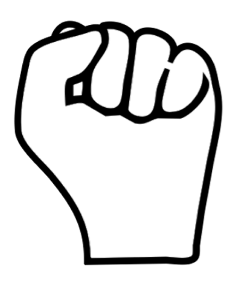

The computer chose
./data/images/Spock.png


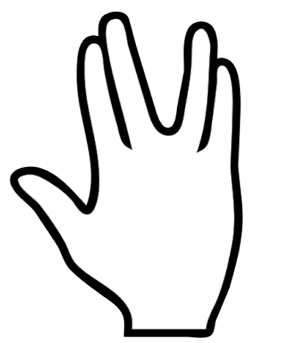


 _____ ________  _________ _   _ _____ ___________
/  __ \  _  |  \/  || ___ \ | | |_   _|  ___| ___ \\
| /  \/ | | | .  . || |_/ / | | | | | | |__ | |_/ /
| |   | | | | |\/| ||  __/| | | | | | |  __||    /
| \__/\ \_/ / |  | || |   | |_| | | | | |___| |\ \
 \____/\___/\_|  |_/\_|    \___/  \_/ \____/\_| \_|


 _    _ _____ _   _  _____   _ _ _
| |  | |_   _| \ | |/  ___| | | | |
| |  | | | | |  \| |\ `--.  | | | |
| |/\| | | | | . ` | `--. \ | | | |
\  /\  /_| |_| |\  |/\__/ / |_|_|_|
 \/  \/ \___/\_| \_/\____/  (_|_|_)

                                                   
There were  0.0 % tied games 
the player won  0.0 % of games
the computer won  100.0 % of games
in a total of  1  games


In [41]:
game_results=start_game(1)

# Let's Create a GUI

In [42]:

import ipywidgets as widgets

In [43]:
def display_action(action):
    print(ascii_action[action])



In [44]:
options=[(action.name,action.value) for action in Action]
menu = widgets.Dropdown(
       options=options ,
       description='Chose:')
output = widgets.Output(layout={'border': '1px solid black'})

def on_button_clicked(b):
    output.clear_output()
    with output:
        computer_action = get_computer_selection()
        determine_winner(Action(menu.value), computer_action)

button = widgets.Button(description="Play!", button_style='success', icon='check')
button.on_click(on_button_clicked)
box = widgets.VBox([menu, button, output])

display(box)

# Time to add a little bit of AI

In [45]:
!pip install numpy
!pip install opencv-python
!pip install mediapipe


You should consider upgrading via the '/Users/giumast/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/giumast/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/giumast/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


In [57]:
import cv2

import numpy as np
import mediapipe as mp

In [58]:
def display_action(action):
    print(f"./data/images/{action.name}.png")
    display(Image(f"data/images/{action.name}.png"))

In [59]:
# Define default camera intrinsic
img_width  = 640
img_height = 480
intrin_default = {
    'fx': img_width*0.9, # Approx 0.7w < f < w https://www.learnopencv.com/approximate-focal-length-for-webcams-and-cell-phone-cameras/
    'fy': img_width*0.9,
    'cx': img_width*0.5, # Approx center of image
    'cy': img_height*0.5,
    'width': img_width,
    'height': img_height,
}

In [60]:
class GestureRecognition:
    def __init__(self):

        # 11 types of gesture 'name':class label
        self.gesture = {
            'fist':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,
            'rock':7,'spiderman':8,'yeah':9,'ok':10,
        }

        # Load training data
        file = np.genfromtxt('./data/gesture_train.csv', delimiter=',')
        # Extract input joint angles
        angle = file[:,:-1].astype(np.float32)
        # Extract output class label
        label = file[:, -1].astype(np.float32)
        # Use OpenCV KNN
        self.knn = cv2.ml.KNearest_create()
        self.knn.train(angle, cv2.ml.ROW_SAMPLE, label)



    def eval(self, angle):
        # Use KNN for gesture recognition
        data = np.asarray([angle], dtype=np.float32)
        ret, results, neighbours ,dist = self.knn.findNearest(data, 3)
        idx = int(results[0][0]) # Index of class label

        return list(self.gesture)[idx] # Return name of class label


class MediaPipeHand:
    def __init__(self, static_image_mode=True, max_num_hands=1,
        model_complexity=1, intrin=None):
        self.max_num_hands = max_num_hands
        if intrin is None:
            self.intrin = intrin_default
        else:
            self.intrin = intrin

        # Access MediaPipe Solutions Python API
        mp_hands = mp.solutions.hands
        # help(mp_hands.Hands)

        # Initialize MediaPipe Hands
        # static_image_mode:
        #   For video processing set to False:
        #   Will use previous frame to localize hand to reduce latency
        #   For unrelated images set to True:
        #   To allow hand detection to run on every input images

        # max_num_hands:
        #   Maximum number of hands to detect

        # model_complexity:
        #   Complexity of the hand landmark model: 0 or 1.
        #   Landmark accuracy as well as inference latency generally
        #   go up with the model complexity. Default to 1.

        # min_detection_confidence:
        #   Confidence value [0,1] from hand detection model
        #   for detection to be considered successful

        # min_tracking_confidence:
        #   Minimum confidence value [0,1] from landmark-tracking model
        #   for hand landmarks to be considered tracked successfully,
        #   or otherwise hand detection will be invoked automatically on the next input image.
        #   Setting it to a higher value can increase robustness of the solution,
        #   at the expense of a higher latency.
        #   Ignored if static_image_mode is true, where hand detection simply runs on every image.

        self.pipe = mp_hands.Hands(
            static_image_mode=static_image_mode,
            max_num_hands=max_num_hands,
            model_complexity=model_complexity,
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5)

        # Define hand parameter
        self.param = []
        for i in range(max_num_hands):
            p = {
                'keypt'   : np.zeros((21,2)), # 2D keypt in image coordinate (pixel)
                'joint'   : np.zeros((21,3)), # 3D joint in camera coordinate (m)
                'class'   : None,             # Left / right / none hand
                'score'   : 0,                # Probability of predicted handedness (always>0.5, and opposite handedness=1-score)
                'angle'   : np.zeros(15),     # Flexion joint angles in degree
                'gesture' : None,             # Type of hand gesture
                'rvec'    : np.zeros(3),      # Global rotation vector Note: this term is only used for solvepnp initialization
                'tvec'    : np.asarray([0,0,0.6]), # Global translation vector (m) Note: Init z direc to some +ve dist (i.e. in front of camera), to prevent solvepnp from wrongly estimating z as -ve
                'fps'     : -1, # Frame per sec
                # https://github.com/google/mediapipe/issues/1351
                # 'visible' : np.zeros(21), # Visibility: Likelihood [0,1] of being visible (present and not occluded) in the image
                # 'presence': np.zeros(21), # Presence: Likelihood [0,1] of being present in the image or if its located outside the image
            }
            self.param.append(p)


    def result_to_param(self, result, img):
        # Convert mediapipe result to my own param
        img_height, img_width, _ = img.shape

        # Reset param
        for p in self.param:
            p['class'] = None

        if result.multi_hand_landmarks is not None:
            # Loop through different hands
            for i, res in enumerate(result.multi_handedness):
                if i>self.max_num_hands-1: break # Note: Need to check if exceed max number of hand
                self.param[i]['class'] = res.classification[0].label
                self.param[i]['score'] = res.classification[0].score

            # Loop through different hands
            for i, res in enumerate(result.multi_hand_landmarks):
                if i>self.max_num_hands-1: break # Note: Need to check if exceed max number of hand
                # Loop through 21 landmark for each hand
                for j, lm in enumerate(res.landmark):
                    self.param[i]['keypt'][j,0] = lm.x * img_width  # Convert normalized coor to pixel [0,1] -> [0,width]
                    self.param[i]['keypt'][j,1] = lm.y * img_height # Convert normalized coor to pixel [0,1] -> [0,height]

                    # Ignore it https://github.com/google/mediapipe/issues/1320
                    # self.param[i]['visible'][j] = lm.visibility
                    # self.param[i]['presence'][j] = lm.presence

        if result.multi_hand_world_landmarks is not None:
            for i, res in enumerate(result.multi_hand_world_landmarks):
                if i>self.max_num_hands-1: break # Note: Need to check if exceed max number of hand
                # Loop through 21 landmark for each hand
                for j, lm in enumerate(res.landmark):
                    self.param[i]['joint'][j,0] = lm.x
                    self.param[i]['joint'][j,1] = lm.y
                    self.param[i]['joint'][j,2] = lm.z

                # Convert relative 3D joint to angle
                self.param[i]['angle'] = self.convert_joint_to_angle(self.param[i]['joint'])
                # Convert relative 3D joint to camera coordinate
                self.convert_joint_to_camera_coor(self.param[i], self.intrin)

        return self.param


    def convert_joint_to_angle(self, joint):
        # Get direction vector of bone from parent to child
        v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19],:] # Parent joint
        v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],:] # Child joint
        v = v2 - v1 # [20,3]
        # Normalize v
        v = v/np.linalg.norm(v, axis=1)[:, np.newaxis]

        # Get angle using arcos of dot product
        angle = np.arccos(np.einsum('nt,nt->n',
            v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],:],
            v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],:])) # [15,]

        return np.degrees(angle) # Convert radian to degree


    def convert_joint_to_camera_coor(self, param, intrin, use_solvepnp=True):
        # MediaPipe version 0.8.9.1 onwards:
        # Given real-world 3D joint centered at middle MCP joint -> J_origin
        # To estimate the 3D joint in camera coordinate          -> J_camera = J_origin + tvec,
        # We need to find the unknown translation vector         -> tvec = [tx,ty,tz]
        # Such that when J_camera is projected to the 2D image plane
        # It matches the 2D keypoint locations

        # Considering all 21 keypoints,
        # Each keypoints will form 2 eq, in total we have 42 eq 3 unknowns
        # Since the equations are linear wrt [tx,ty,tz]
        # We can solve the unknowns using linear algebra A.x = b, where x = [tx,ty,tz]

        # Consider a single keypoint (pixel x) and joint (X,Y,Z)
        # Using the perspective projection eq:
        # (x - cx)/fx = (X + tx) / (Z + tz)
        # Similarly for pixel y:
        # (y - cy)/fy = (Y + ty) / (Z + tz)
        # Rearranging the above linear equations by keeping constants to the right hand side:
        # fx.tx - (x - cx).tz = -fx.X + (x - cx).Z
        # fy.ty - (y - cy).tz = -fy.Y + (y - cy).Z
        # Therefore, we can factor out the unknowns and form a matrix eq:
        # [fx  0 (x - cx)][tx]   [-fx.X + (x - cx).Z]
        # [ 0 fy (y - cy)][ty] = [-fy.Y + (y - cy).Z]
        #                 [tz]

        idx = [i for i in range(21)] # Use all landmarks

        if use_solvepnp:
            # Method 1: OpenCV solvePnP
            fx, fy = intrin['fx'], intrin['fy']
            cx, cy = intrin['cx'], intrin['cy']
            intrin_mat = np.asarray([[fx,0,cx],[0,fy,cy],[0,0,1]])
            dist_coeff = np.zeros(4)

            ret, param['rvec'], param['tvec'] = cv2.solvePnP(
                param['joint'][idx], param['keypt'][idx],
                intrin_mat, dist_coeff, param['rvec'], param['tvec'],
                useExtrinsicGuess=True)
            # Add tvec to all joints
            param['joint'] += param['tvec']

        else:
            # Method 2:
            A = np.zeros((len(idx),2,3))
            b = np.zeros((len(idx),2))

            A[:,0,0] = intrin['fx']
            A[:,1,1] = intrin['fy']
            A[:,0,2] = -(param['keypt'][idx,0] - intrin['cx'])
            A[:,1,2] = -(param['keypt'][idx,1] - intrin['cy'])

            b[:,0] = -intrin['fx'] * param['joint'][idx,0] \
                     + (param['keypt'][idx,0] - intrin['cx']) * param['joint'][idx,2]
            b[:,1] = -intrin['fy'] * param['joint'][idx,1] \
                     + (param['keypt'][idx,1] - intrin['cy']) * param['joint'][idx,2]

            A = A.reshape(-1,3) # [8,3]
            b = b.flatten() # [8]

            # Use the normal equation AT.A.x = AT.b to minimize the sum of the sq diff btw left and right sides
            x = np.linalg.solve(A.T @ A, A.T @ b)
            # Add tvec to all joints
            param['joint'] += x



    def forward(self, img):

        # Extract result
        result = self.pipe.process(img)

        # Convert result to my own param
        param = self.result_to_param(result, img)

        return param




In [61]:
import io

try:
  from  google.colab.output import eval_js
  colab = True
except:
  colab = False

# colab=False

if colab:
    from IPython.display import display, Javascript
    from  google.colab.output import eval_js
    from base64 import b64decode
    from PIL import Image as PIL_Image


    def take_photo(quality=0.8):
        js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])


        image = PIL_Image.open(io.BytesIO(binary))
        image_np = np.array(image)

        # with open(filename, 'wb') as f:
        #   f.write(binary)
        return image_np
else:
    import cv2
    def take_photo(filename='photo.jpg', quality=0.8):
        cam = cv2.VideoCapture(0)

        cv2.namedWindow("test")

        img_counter = 0

        while True:
            ret, frame = cam.read()
            # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
            if not ret:
                print("failed to grab frame")
                break
            cv2.imshow("test", frame)

            k = cv2.waitKey(1)
            if k%256 == 27 or k%256 == 32 :
                # ESC pressed
                break

        cam.release()

        cv2.destroyAllWindows()

        # Preprocess image
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Flip image for 3rd person view
        img = cv2.flip(img, 1)

        # To improve performance, optionally mark image as not writeable to pass by reference
        img.flags.writeable = False

        return img

In [62]:
from matplotlib import pyplot as plt
from IPython.display import Image
def start_game(num_games=1):
    game_results=[]
    counter=0
    # Load mediapipe hand class
    pipe = MediaPipeHand(static_image_mode=True, max_num_hands=1)
    # Load gesture recognition class
    gest = GestureRecognition()
    while True:
        try:
            img = take_photo()

            # # Show the image which was just taken.
            # plt.imshow(img)
            # Feedforward to extract keypoint
            param = pipe.forward(img)
            # Evaluate gesture for all hands

            for p in param:
                if p['class'] is not None:
                    p['gesture'] = gest.eval(p['angle'])
                    # print(p['class'])
                    # print(p['gesture'])

                    if p['gesture']=='fist':
                        action = Action.Rock
                    elif p['gesture']=='five':
                        action = Action.Paper
                    elif (p['gesture']=='three') or (p['gesture']=='yeah'):
                        action = Action.Scissors
                    elif (p['gesture']=='rock') :
                        action = Action.Lizard
                    elif (p['gesture']=='four'):
                        action = Action.Spock
                    if action is not None:
                        computer_action = get_computer_selection()
                        game_results.append(determine_winner(action, computer_action))
                        counter+=1
                        print_game_results(game_results)
                        old_action=action

            if counter>=num_games:
                break
        except Exception as err:
            # Errors will be thrown if the user does not have a webcam or if they do not
            # grant the page permission to access it.
            print(str(err))
            raise err

    pipe.pipe.close()

In [63]:
start_game(num_games=5)

failed to grab frame
OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [48]:
# 3D display

In [64]:
!pip install open3d
import open3d as o3d
class DisplayCamera:
    def __init__(self, vis, intrin=None):
        self.vis = vis

        # Get camera intrinsics param
        if intrin is None:
            self.intrin = intrin_default
        else:
            self.intrin = intrin

        # Note: Need to subtract optical center by 0.5
        # https://github.com/intel-isl/Open3D/issues/727
        self.intrin['cx'] -= 0.5
        self.intrin['cy'] -= 0.5

        # For reset_view
        self.pinhole = o3d.camera.PinholeCameraParameters()
        self.pinhole.extrinsic = np.eye(4)
        self.pinhole.intrinsic = o3d.camera.PinholeCameraIntrinsic(
            self.intrin['width'], self.intrin['height'],
            self.intrin['fx'], self.intrin['fy'],
            self.intrin['cx'], self.intrin['cy'])


    def reset_view(self):
        # Reset camera view to this camera
        self.vis.get_view_control().convert_from_pinhole_camera_parameters(
            self.pinhole)


    def unproject_pt(self, u, v, depth):
        # Transform 2D pixels to 3D points
        # Given pixel coordinates and depth in an image
        # with no distortion or inverse distortion coefficients
        # compute the corresponding point in 3D space relative to the same camera
        x = (u - self.intrin['cx'])/self.intrin['fx']*depth
        y = (v - self.intrin['cy'])/self.intrin['fy']*depth
        z = depth

        return [x, y, z]


    def create_camera_frustum(self, depth=[0.5,1.0]):
        # Get camera intrinsics param
        w  = self.intrin['width']
        h  = self.intrin['height']

        # Each frustum 8 lines, each line 2 pts, and plot at 2 different depths
        points, lines = [], []
        c = 0 # Counter
        points.append([0,0,0]) # Origin
        for d in depth: # Plot at different depth
            points.append(self.unproject_pt(0, 0, d)) # Top left
            points.append(self.unproject_pt(w, 0, d)) # Top right
            points.append(self.unproject_pt(w, h, d)) # Bottom left
            points.append(self.unproject_pt(0, h, d)) # Bottom right
            lines.append([0,c+1]);   lines.append([0,c+2])
            lines.append([0,c+3]);   lines.append([0,c+4])
            lines.append([c+1,c+2]); lines.append([c+2,c+3])
            lines.append([c+3,c+4]); lines.append([c+4,c+1])
            c += 4

        # Set to uniform light gray color
        colors = [[0.75,0.75,0.75] for i in range(len(lines))]

        line = o3d.geometry.LineSet()
        line.lines  = o3d.utility.Vector2iVector(lines)
        line.points = o3d.utility.Vector3dVector(points)
        line.colors = o3d.utility.Vector3dVector(colors)

        return line


    def create_mesh_img(self, img=None, depth=1.0):
        # Get camera intrinsics param
        w  = self.intrin['width']
        h  = self.intrin['height']

        if img is None:
            img = np.zeros((h, w, 3), dtype=np.uint8)

        vert = []
        vert.append(self.unproject_pt( 0, 0, depth)) # Top left
        vert.append(self.unproject_pt( w, 0, depth)) # Top right
        vert.append(self.unproject_pt( w, h, depth)) # Bottom left
        vert.append(self.unproject_pt( 0, h, depth)) # Bottom right

        mesh = o3d.geometry.TriangleMesh()
        # Convention of 4 vertices
        # --> right x
        # Down y
        # Vertex 0 (-x,-y) -- Vertex 1 (x,-y)
        # Vertex 3 (-x,y)  -- Vertex 2 (x,y)
        mesh.vertices = o3d.utility.Vector3dVector(vert)
        # Anti-clockwise direction (4 triangles to allow two-sided views)
        mesh.triangles = o3d.utility.Vector3iVector(
            [[0,2,1],[0,3,2],  # Front face
             [0,1,2],[0,2,3]]) # Back face
        # Define the uvs to match img coor to the order of triangles
        # Top left    (0,0) -- Top right    (1,0)
        # Bottom left (0,1) -- Bottom right (1,1)
        mesh.triangle_uvs = o3d.utility.Vector2dVector(
            [[0,0],[1,1],[1,0], [0,0],[0,1],[1,1], # Front face
             [0,0],[1,0],[1,1], [0,0],[1,1],[0,1]]) # Back face
        # Image to be displayed
        mesh.textures = [o3d.geometry.Image(img)]

        num_face = np.asarray(mesh.triangles).shape[0]
        mesh.triangle_material_ids = o3d.utility.IntVector(
            np.zeros(num_face, dtype=np.int32))

        return mesh



class DisplayHand:
    def __init__(self, draw3d=False, draw_camera=False, intrin=None, max_num_hands=1, vis=None):
        self.max_num_hands = max_num_hands
        if intrin is None:
            self.intrin = intrin_default
        else:
            self.intrin = intrin

        # Define kinematic tree linking keypoint together to form skeleton
        self.ktree = [0,          # Wrist
                      0,1,2,3,    # Thumb
                      0,5,6,7,    # Index
                      0,9,10,11,  # Middle
                      0,13,14,15, # Ring
                      0,17,18,19] # Little

        # Define color for 21 keypoint
        self.color = [[0,0,0], # Wrist black
                      [255,0,0],[255,60,0],[255,120,0],[255,180,0], # Thumb
                      [0,255,0],[60,255,0],[120,255,0],[180,255,0], # Index
                      [0,255,0],[0,255,60],[0,255,120],[0,255,180], # Middle
                      [0,0,255],[0,60,255],[0,120,255],[0,180,255], # Ring
                      [0,0,255],[60,0,255],[120,0,255],[180,0,255]] # Little
        self.color = np.asarray(self.color)
        self.color_ = self.color / 255 # For Open3D RGB
        self.color[:,[0,2]] = self.color[:,[2,0]] # For OpenCV BGR
        self.color = self.color.tolist()


        ############################
        ### Open3D visualization ###
        ############################
        if draw3d:
            if vis is not None:
                self.vis = vis
            else:
                self.vis = o3d.visualization.Visualizer()
                self.vis.create_window(
                    width=self.intrin['width'], height=self.intrin['height'])
            self.vis.get_render_option().point_size = 8.0
            joint = np.zeros((21,3))

            # Draw 21 joints
            self.pcd = []
            for i in range(max_num_hands):
                p = o3d.geometry.PointCloud()
                p.points = o3d.utility.Vector3dVector(joint)
                p.colors = o3d.utility.Vector3dVector(self.color_)
                self.pcd.append(p)

            # Draw 20 bones
            self.bone = []
            for i in range(max_num_hands):
                b = o3d.geometry.LineSet()
                b.points = o3d.utility.Vector3dVector(joint)
                b.colors = o3d.utility.Vector3dVector(self.color_[1:])
                b.lines  = o3d.utility.Vector2iVector(
                    [[0,1], [1,2],  [2,3],  [3,4],    # Thumb
                     [0,5], [5,6],  [6,7],  [7,8],    # Index
                     [0,9], [9,10], [10,11],[11,12],  # Middle
                     [0,13],[13,14],[14,15],[15,16],  # Ring
                     [0,17],[17,18],[18,19],[19,20]]) # Little
                self.bone.append(b)

            # Draw world reference frame
            frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5)

            # Add geometry to visualize
            self.vis.add_geometry(frame)
            for i in range(max_num_hands):
                self.vis.add_geometry(self.pcd[i])
                self.vis.add_geometry(self.bone[i])

            # Set camera view
            ctr = self.vis.get_view_control()
            ctr.set_up([0,-1,0]) # Set up as -y axis
            ctr.set_front([0,0,-1]) # Set to looking towards -z axis
            ctr.set_lookat([0,0,0]) # Set to center of view
            ctr.set_zoom(1)

            if draw_camera:
                # Remove previous frame
                self.vis.remove_geometry(frame)
                # Draw camera reference frame
                frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)
                # Draw camera frustum
                self.camera = DisplayCamera(self.vis, self.intrin)
                frustum = self.camera.create_camera_frustum()
                # Draw 2D image plane in 3D space
                self.mesh_img = self.camera.create_mesh_img()
                # Add geometry to visualize
                self.vis.add_geometry(frame)
                self.vis.add_geometry(frustum)
                self.vis.add_geometry(self.mesh_img)
                # Reset camera view
                self.camera.reset_view()


    def draw2d(self, img, param):
        img_height, img_width, _ = img.shape

        # Loop through different hands
        for p in param:
            if p['class'] is not None:
                # Label left or right hand
                x = int(p['keypt'][0,0]) - 30
                y = int(p['keypt'][0,1]) + 40
                # cv2.putText(img, '%s %.3f' % (p['class'], p['score']), (x, y),
                cv2.putText(img, '%s' % (p['class']), (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2) # Red

                # Loop through keypoint for each hand
                for i in range(21):
                    x = int(p['keypt'][i,0])
                    y = int(p['keypt'][i,1])
                    if x>0 and y>0 and x<img_width and y<img_height:
                        # Draw skeleton
                        start = p['keypt'][self.ktree[i],:]
                        x_ = int(start[0])
                        y_ = int(start[1])
                        if x_>0 and y_>0 and x_<img_width and y_<img_height:
                            cv2.line(img, (x_, y_), (x, y), self.color[i], 2)

                        # Draw keypoint
                        cv2.circle(img, (x, y), 5, self.color[i], -1)
                        # cv2.circle(img, (x, y), 3, self.color[i], -1)

                        # # Number keypoint
                        # cv2.putText(img, '%d' % (i), (x, y),
                        #     cv2.FONT_HERSHEY_SIMPLEX, 1, self.color[i])

                        # # Label visibility and presence
                        # cv2.putText(img, '%.1f, %.1f' % (p['visible'][i], p['presence'][i]),
                        #     (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, self.color[i])

                # Label gesture
                if p['gesture'] is not None:
                    size = cv2.getTextSize(p['gesture'].upper(),
                        # cv2.FONT_HERSHEY_SIMPLEX, 2, 2)[0]
                        cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
                    x = int((img_width-size[0]) / 2)
                    cv2.putText(img, p['gesture'].upper(),
                        # (x, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2)
                        (x, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

                    # Label joint angle
                    self.draw_joint_angle(img, p)

            # Label fps
            if p['fps']>0:
                cv2.putText(img, 'FPS: %.1f' % (p['fps']),
                    (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

        return img


    def draw2d_(self, img, param):
        # Different from draw2d
        # draw2d_ draw 2.5D with relative depth info
        # The closer the landmark is towards the camera
        # The lighter and larger the circle

        img_height, img_width, _ = img.shape

        # Loop through different hands
        for p in param:
            if p['class'] is not None:
                # Extract wrist pixel
                x = int(p['keypt'][0,0]) - 30
                y = int(p['keypt'][0,1]) + 40
                # Label left or right hand
                cv2.putText(img, '%s %.3f' % (p['class'], p['score']), (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2) # Red

                min_depth = min(p['joint'][:,2])
                max_depth = max(p['joint'][:,2])

                # Loop through keypt and joint for each hand
                for i in range(21):
                    x = int(p['keypt'][i,0])
                    y = int(p['keypt'][i,1])
                    if x>0 and y>0 and x<img_width and y<img_height:
                        # Convert depth to color nearer white, further black
                        depth = (max_depth-p['joint'][i,2]) / (max_depth-min_depth)
                        color = [int(255*depth), int(255*depth), int(255*depth)]
                        size = int(10*depth)+2
                        # size = 2

                        # Draw skeleton
                        start = p['keypt'][self.ktree[i],:]
                        x_ = int(start[0])
                        y_ = int(start[1])
                        if x_>0 and y_>0 and x_<img_width and y_<img_height:
                            cv2.line(img, (x_, y_), (x, y), color, 2)

                        # Draw keypoint
                        cv2.circle(img, (x, y), size, color, size)

            # Label fps
            if p['fps']>0:
                cv2.putText(img, 'FPS: %.1f' % (p['fps']),
                    (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

        return img


    def draw3d(self, param, img=None):
        for i in range(self.max_num_hands):
            if param[i]['class'] is None:
                self.pcd[i].points = o3d.utility.Vector3dVector(np.zeros((21,3)))
                self.bone[i].points = o3d.utility.Vector3dVector(np.zeros((21,3)))
            else:
                self.pcd[i].points = o3d.utility.Vector3dVector(param[i]['joint'])
                self.bone[i].points = o3d.utility.Vector3dVector(param[i]['joint'])

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            self.mesh_img.textures = [o3d.geometry.Image(img)]


    def draw_joint_angle(self, img, p):
        # Create text
        text = None
        if p['gesture']=='Finger MCP Flexion':
            text = 'Index : %.1f \
                  \nMiddle: %.1f \
                  \nRing  : %.1f \
                  \nLittle : %.1f' % \
                (p['angle'][3], p['angle'][6], p['angle'][9], p['angle'][12])

        elif p['gesture']=='Finger PIP DIP Flexion':
            text = 'PIP: \
                  \nIndex : %.1f \
                  \nMiddle: %.1f \
                  \nRing  : %.1f \
                  \nLittle : %.1f \
                  \nDIP: \
                  \nIndex : %.1f \
                  \nMiddle: %.1f \
                  \nRing  : %.1f \
                  \nLittle : %.1f' % \
                (p['angle'][4], p['angle'][7], p['angle'][10], p['angle'][13],
                 p['angle'][5], p['angle'][8], p['angle'][11], p['angle'][14])

        elif p['gesture']=='Thumb MCP Flexion':
            text = 'Angle: %.1f' % p['angle'][1]

        elif p['gesture']=='Thumb IP Flexion':
            text = 'Angle: %.1f' % p['angle'][2]

        elif p['gesture']=='Thumb Radial Abduction':
            text = 'Angle: %.1f' % p['angle'][0]

        elif p['gesture']=='Thumb Palmar Abduction':
            text = 'Angle: %.1f' % p['angle'][0]

        elif p['gesture']=='Thumb Opposition':
            # Dist btw thumb and little fingertip
            dist = np.linalg.norm(p['joint'][4] - p['joint'][20])
            text = 'Dist: %.3f' % dist

        elif p['gesture']=='Forearm Neutral' or \
             p['gesture']=='Forearm Pronation' or \
             p['gesture']=='Forearm Supination' or \
             p['gesture']=='Wrist Flex/Extension' or \
             p['gesture']=='Wrist Radial/Ulnar Dev':
            text = 'Angle: %.1f' % p['angle'][0]

        if text is not None:
            x0 = 10 # Starting x coor for placing text
            y0 = 60 # Starting y coor for placing text
            dy = 25 # Change in text vertical spacing
            vert = len(text.split('\n'))
            # Draw black background
            cv2.rectangle(img, (x0, y0), (140, y0+vert*dy+10), (0,0,0), -1)
            # Draw text
            for i, line in enumerate(text.split('\n')):
                y = y0 + (i+1)*dy
                cv2.putText(img, line,
                    (x0, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)


    def draw_game_rps(self, img, param):
        img_height, img_width, _ = img.shape

        # Init result of 2 hands to none
        res = [None, None]

        # Loop through different hands
        for j, p in enumerate(param):
            # Only allow maximum of two hands
            if j>1:
                break

            if p['class'] is not None:
                # Loop through keypoint for each hand
                for i in range(21):
                    x = int(p['keypt'][i,0])
                    y = int(p['keypt'][i,1])
                    if x>0 and y>0 and x<img_width and y<img_height:
                        # Draw skeleton
                        start = p['keypt'][self.ktree[i],:]
                        x_ = int(start[0])
                        y_ = int(start[1])
                        if x_>0 and y_>0 and x_<img_width and y_<img_height:
                            cv2.line(img, (x_, y_), (x, y), self.color[i], 2)

                        # Draw keypoint
                        cv2.circle(img, (x, y), 5, self.color[i], -1)

                # Label gesture
                text = None
                if p['gesture']=='fist':
                    text = f"Rock {p['gesture']}"
                elif p['gesture']=='five':
                    text = f"Paper {p['gesture']}"
                elif (p['gesture']=='three') or (p['gesture']=='yeah'):
                    text = f"Scissors {p['gesture']}"
                elif (p['gesture']=='rock') :
                    text = f"Lizard {p['gesture']}"
                elif (p['gesture']=='four'):
                    text = f"Spock {p['gesture']}"
                else:
                    text = f"{p['gesture']}"



                res[j] = text

                # Label result
                if text is not None:
                    x = int(p['keypt'][0,0]) - 30
                    y = int(p['keypt'][0,1]) + 40
                    cv2.putText(img, '%s' % (text.upper()), (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2) # Red

        # Determine winner
        text = None
        winner = None
        if res[0]=='rock':
            if res[1]=='rock'     : text = 'Tie'
            elif res[1]=='paper'  : text = 'Paper wins'  ; winner = 1
            elif res[1]=='scissor': text = 'Rock wins'   ; winner = 0
        elif res[0]=='paper':
            if res[1]=='rock'     : text = 'Paper wins'  ; winner = 0
            elif res[1]=='paper'  : text = 'Tie'
            elif res[1]=='scissor': text = 'Scissor wins'; winner = 1
        elif res[0]=='scissor':
            if res[1]=='rock'     : text = 'Rock wins'   ; winner = 1
            elif res[1]=='paper'  : text = 'Scissor wins'; winner = 0
            elif res[1]=='scissor': text = 'Tie'

        # Label gesture
        if text is not None:
            size = cv2.getTextSize(text.upper(),
                # cv2.FONT_HERSHEY_SIMPLEX, 2, 2)[0]
                cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
            x = int((img_width-size[0]) / 2)
            cv2.putText(img, text.upper(),
                # (x, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2)
                (x, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

        # Draw winner text
        if winner is not None:
            x = int(param[winner]['keypt'][0,0]) - 30
            y = int(param[winner]['keypt'][0,1]) + 80
            cv2.putText(img, 'WINNER', (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2) # Yellow

        return img




You should consider upgrading via the '/Users/giumast/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


In [ ]:



# Load mediapipe hand class
pipe = MediaPipeHand(static_image_mode=False, max_num_hands=2)
# Load gesture recognition class
gest = GestureRecognition()

# Load display class
disp = DisplayHand(max_num_hands=2)

# Start video capture
cap = cv2.VideoCapture(0) # By default webcam is index 0



counter = 0
game_results=[]
old_action=None
while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break

    # Preprocess image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Flip image for 3rd person view
    img = cv2.flip(img, 1)

    # To improve performance, optionally mark image as not writeable to pass by reference
    img.flags.writeable = False

    # Feedforward to extract keypoint
    param = pipe.forward(img)
    # Evaluate gesture for all hands

    for p in param:
        if p['class'] is not None:
            p['gesture'] = gest.eval(p['angle'])
            # print(p['class'])
            # print(p['gesture'])

            if p['gesture']=='fist':
                action = Action.Rock
            elif p['gesture']=='five':
                action = Action.Paper
            elif (p['gesture']=='three') or (p['gesture']=='yeah'):
                action = Action.Scissors
            elif (p['gesture']=='rock') :
                action = Action.Lizard
            elif (p['gesture']=='four'):
                action = Action.Spock
            if action is not None and (old_action is None or action.name!=old_action.name):
                # computer_action = get_computer_selection()
                # game_results.append(determine_winner(action, computer_action))
                # counter+=1
                # print_game_results(game_results)
                # old_action=action
                pass


    img.flags.writeable = True

    # Display keypoint and result of rock paper scissor game
    cv2.imshow('Game: Rock Paper Scissor', disp.draw_game_rps(img.copy(), param))
    key = cv2.waitKey(1)
    if key==27:
        break

pipe.pipe.close()
cap.release()